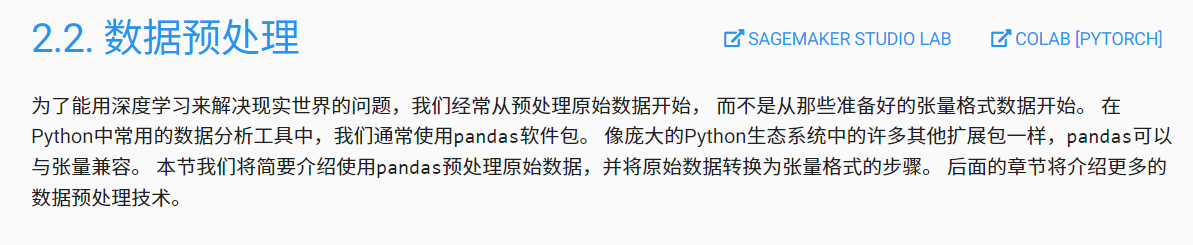

# 1. 读取数据集

举一个例子，我们首先创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。 以其他格式存储的数据也可以通过类似的方式进行处理。 下面我们将数据集按行写入CSV文件中。


In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

要从创建的CSV文件中加载原始数据集，我们导入pandas包并调用read_csv函数。该数据集有四行三列。其中每行描述了房间数量（“NumRooms”）、巷子类型（“Alley”）和房屋价格（“Price”）。

In [3]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


# 2. 处理缺失值

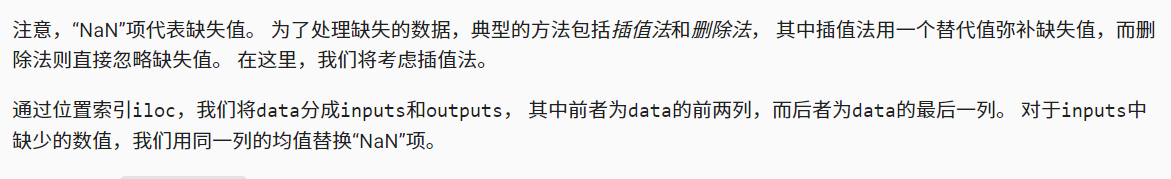

In [5]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


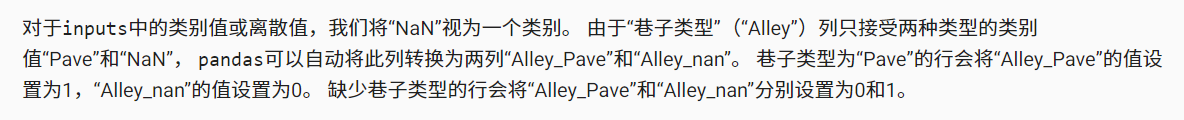

In [6]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


# 3. 转换为张量格式

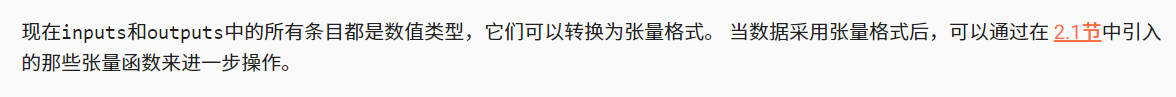

In [8]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))